<a href="https://colab.research.google.com/github/yForecasting/LeadingIndicatorIntelligence/blob/master/TS_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Time series learning

toy examples

In [33]:
from sklearn import linear_model
clf = linear_model.Lasso(alpha=0.1)
clf.fit([[0,0], [1, 1], [2, 2]], [0, 1, 2])

print(clf.coef_)
print(clf.intercept_)


[0.85 0.  ]
0.15000000000000002


In [35]:
from sklearn.linear_model import LassoCV
from sklearn.datasets import make_regression
X, y = make_regression(noise=4, random_state=0)
reg = LassoCV(cv=5, random_state=0).fit(X, y)
reg.score(X, y)

reg.predict(X[:1,])


array([-78.49519808])

In [43]:
import sklearn
print(sklearn.__version__)

0.22.2.post1


bigger example with simulated data

In [1]:
import time

import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LassoCV, LassoLarsCV, LassoLarsIC
from sklearn import datasets

# This is to avoid division by zero while doing np.log10
EPSILON = 1e-4

X, y = datasets.load_diabetes(return_X_y=True)

rng = np.random.RandomState(42)
X = np.c_[X, rng.randn(X.shape[0], 14)]  # add some bad features

# normalize data as done by Lars to allow for comparison
X /= np.sqrt(np.sum(X ** 2, axis=0))

# #############################################################################

In [26]:
X.shape

(442, 24)

Text(0.5, 1.0, 'Information-criterion for model selection (training time 0.043s)')

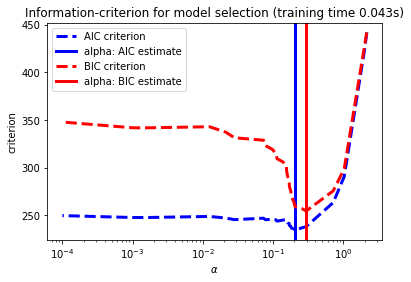

In [2]:
# #############################################################################
# LassoLarsIC: least angle regression with BIC/AIC criterion

model_bic = LassoLarsIC(criterion='bic')
t1 = time.time()
model_bic.fit(X, y)
t_bic = time.time() - t1
alpha_bic_ = model_bic.alpha_

model_aic = LassoLarsIC(criterion='aic')
model_aic.fit(X, y)
alpha_aic_ = model_aic.alpha_


def plot_ic_criterion(model, name, color):
    criterion_ = model.criterion_
    plt.semilogx(model.alphas_ + EPSILON, criterion_, '--', color=color,
                 linewidth=3, label='%s criterion' % name)
    plt.axvline(model.alpha_ + EPSILON, color=color, linewidth=3,
                label='alpha: %s estimate' % name)
    plt.xlabel(r'$\alpha$')
    plt.ylabel('criterion')


plt.figure()
plot_ic_criterion(model_aic, 'AIC', 'b')
plot_ic_criterion(model_bic, 'BIC', 'r')
plt.legend()
plt.title('Information-criterion for model selection (training time %.3fs)'
          % t_bic)

Computing regularization path using the coordinate descent lasso...


(2300.0, 3800.0)

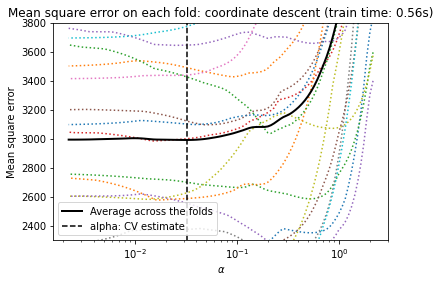

In [3]:
# #############################################################################
# LassoCV: coordinate descent

# Compute paths
print("Computing regularization path using the coordinate descent lasso...")
t1 = time.time()
model = LassoCV(cv=20).fit(X, y)
t_lasso_cv = time.time() - t1

# Display results
plt.figure()
ymin, ymax = 2300, 3800
plt.semilogx(model.alphas_ + EPSILON, model.mse_path_, ':')
plt.plot(model.alphas_ + EPSILON, model.mse_path_.mean(axis=-1), 'k',
         label='Average across the folds', linewidth=2)
plt.axvline(model.alpha_ + EPSILON, linestyle='--', color='k',
            label='alpha: CV estimate')

plt.legend()

plt.xlabel(r'$\alpha$')
plt.ylabel('Mean square error')
plt.title('Mean square error on each fold: coordinate descent '
          '(train time: %.2fs)' % t_lasso_cv)
plt.axis('tight')
plt.ylim(ymin, ymax)

minimum cv error -- get alpha

In [19]:
model.alphas_


array([2.14804358, 2.01202713, 1.02466283, 0.71509967, 0.29441369,
       0.25350273, 0.20481219, 0.19617412, 0.18173007, 0.17838648,
       0.16983863, 0.16886564, 0.15974156, 0.15503076, 0.15400284,
       0.13556179, 0.11341888, 0.10923041, 0.09663336, 0.07697001,
       0.07261289, 0.03274278])

In [18]:
model.alpha_

0.032742775719386934

In [22]:
model.coef_

array([   0.        , -217.53737874,  525.7068334 ,  299.79599097,
       -112.33829458,    0.        , -244.45083874,    0.        ,
        497.66009565,   87.91659553,  -15.2825558 ,  -42.78911938,
         34.84457547,  -63.68361654,  -52.19249918,   50.18926885,
         30.04664282,  -63.80163384,  -30.17796157,   72.63780064,
         61.64153314,   47.36646391,  119.01643045,   41.84632122])

Get the corresponding coef of lasso cv with the alpha with minimal cross validation error

In [29]:
model.coef_path_[-1]

array([ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  7.06386762, 17.60943723,
       19.91174254, 41.83361698])

or more generic

In [37]:
model.alphas_.shape

(22,)

In [38]:
model.coef_path_.shape

(24, 22)

In [50]:
find_alpha = np.array(model.alphas_ == model.alpha_)

In [51]:
model.coef_path_[:,find_alpha]

array([[   0.        ],
       [-217.53737874],
       [ 525.7068334 ],
       [ 299.79599097],
       [-112.33829458],
       [   0.        ],
       [-244.45083874],
       [   0.        ],
       [ 497.66009565],
       [  87.91659553],
       [ -15.27895727],
       [ -42.78887831],
       [  34.83570898],
       [ -63.41234597],
       [ -51.96760728],
       [  50.08241659],
       [  30.03736406],
       [ -63.7701677 ],
       [ -30.16928205],
       [  72.61912768],
       [  61.55581313],
       [  47.35766801],
       [ 118.97363793],
       [  41.83361698]])

What about we take the alpha from Lasso CV and put it in a regular Lasso?


In [30]:
from sklearn import linear_model
clf = linear_model.Lasso(alpha=model.alpha_)
clf.fit(X,y)
print(clf.coef_)

[  -0.         -217.53848486  525.7013845   299.79267298 -112.34012043
   -0.         -244.44417373    0.          497.66209949   87.90994071
  -15.28188038  -42.79270302   34.83324357  -63.6146607   -52.12495671
   50.16156414   30.03676879  -63.79301538  -30.17603081   72.63550248
   61.62472247   47.3739821   119.01437297   41.83643066]


lasso lars cv (not used)


Computing regularization path using the Lars lasso...


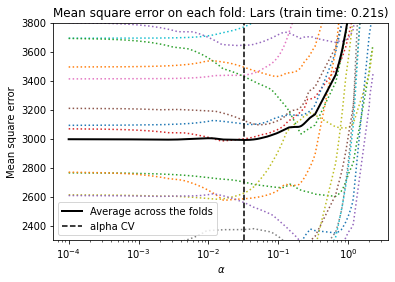

In [4]:
# #############################################################################
# LassoLarsCV: least angle regression

# Compute paths
print("Computing regularization path using the Lars lasso...")
t1 = time.time()
model = LassoLarsCV(cv=20).fit(X, y)
t_lasso_lars_cv = time.time() - t1

# Display results
plt.figure()
plt.semilogx(model.cv_alphas_ + EPSILON, model.mse_path_, ':')
plt.semilogx(model.cv_alphas_ + EPSILON, model.mse_path_.mean(axis=-1), 'k',
             label='Average across the folds', linewidth=2)
plt.axvline(model.alpha_, linestyle='--', color='k',
            label='alpha CV')
plt.legend()

plt.xlabel(r'$\alpha$')
plt.ylabel('Mean square error')
plt.title('Mean square error on each fold: Lars (train time: %.2fs)'
          % t_lasso_lars_cv)
plt.axis('tight')
plt.ylim(ymin, ymax)

plt.show()